In [39]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [40]:
data = fetch_california_housing()
X, y = data.data, data.target


In [41]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:


gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=200, random_state=42)

In [44]:


y_pred = gbr.predict(X_test)


In [45]:


print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.26149849837343114
R² Score: 0.8004451261281281


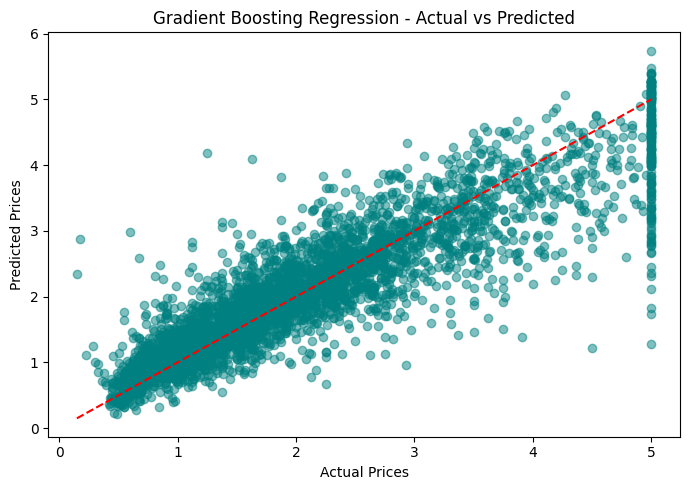

In [46]:


plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting Regression - Actual vs Predicted")
plt.tight_layout()
plt.show()


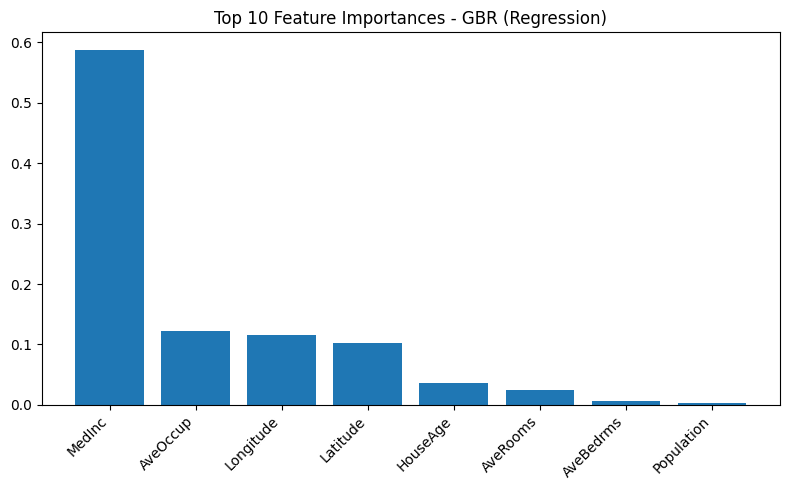

In [47]:

importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [data.feature_names[i] for i in indices], rotation=45, ha='right')
plt.title("Top 10 Feature Importances - GBR (Regression)")
plt.tight_layout()
plt.show()